<a href="https://colab.research.google.com/github/jiin124/2021_2_SAI_ML/blob/main/%EA%B5%AC%EB%82%B4%EC%8B%9D%EB%8B%B9_%EC%8B%9D%EC%88%98_%EC%9D%B8%EC%9B%90_%EC%98%88%EC%B8%A1_AI_%EA%B2%BD%EC%A7%84%EB%8C%80%ED%9A%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

지금까지는 단순한 시계열 추세와 담당자의 직관적 경험에 의존하여한국토지주택공사 구내식당 식수 인원을 예측하였으나,

 

빅데이터 분석으로 얻어지는 보다 정확도 높은 예측을 통해 잔반 발생량을 획기적으로 줄이고자 합니다.

[주제]

 

구내식당의 요일별 점심, 저녁식사를 먹는 인원을 예측

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [117]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")


In [118]:
train.head()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0
3,2016-02-04,목,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0
4,2016-02-05,금,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0


In [119]:
test.head()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴
0,2021-01-27,수,2983,88,182,5,358.0,모닝롤/연유버터베이글 우유/주스 계란후라이/찐계란 단호박죽/흑미밥 우거지국 고기완자...,쌀밥/흑미밥/찰현미밥 대구지리 매운돈갈비찜 오꼬노미계란말이 상추무침 포기김치 양상추...,흑미밥 얼큰순두부찌개 쇠고기우엉볶음 버섯햄볶음 (New)아삭이고추무절임 포기김치
1,2021-01-28,목,2983,104,212,409,348.0,모닝롤/대만샌드위치 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 황태국 시래기지짐 ...,쌀밥/보리밥/찰현미밥 우렁된장찌개 오리주물럭 청양부추전 수제삼색무쌈 겉절이김치 양상...,충무김밥 우동국물 오징어무침 꽃맛살샐러드 얼갈이쌈장무침 석박지
2,2021-01-29,금,2983,270,249,0,294.0,모닝롤/핫케익 우유/주스 계란후라이/찐계란 오곡죽/흑미밥 매생이굴국 고구마순볶음 양...,쌀밥/흑미밥/찰현미밥 팽이장국 수제돈까스*소스 가자미조림 동초나물무침 포기김치 양상...,흑미밥 물만둣국 카레찜닭 숯불양념꼬지어묵 꼬시래기무침 포기김치
3,2021-02-01,월,2924,108,154,538,322.0,모닝롤/촉촉한치즈케익 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 두부김칫국 새우완...,쌀밥/흑미밥/찰현미밥 배추들깨국 오리대패불고기 시금치프리타타 부추고추장무침 포기김치...,흑미밥 동태탕 돈육꽈리고추장조림 당면채소무침 모자반무침 포기김치
4,2021-02-02,화,2924,62,186,455,314.0,모닝롤/토마토샌드 우유/주스 계란후라이/찐계란 채소죽/흑미밥 호박맑은국 오이생채 양...,쌀밥/팥밥/찰현미밥 부대찌개 닭살데리야끼조림 버섯탕수 세발나물무침 알타리김치/사과푸...,흑미밥 바지락살국 쇠고기청경채볶음 두부구이*볶은김치 머위된장무침 백김치


In [120]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   일자              1205 non-null   object 
 1   요일              1205 non-null   object 
 2   본사정원수           1205 non-null   int64  
 3   본사휴가자수          1205 non-null   int64  
 4   본사출장자수          1205 non-null   int64  
 5   본사시간외근무명령서승인건수  1205 non-null   int64  
 6   현본사소속재택근무자수     1205 non-null   float64
 7   조식메뉴            1205 non-null   object 
 8   중식메뉴            1205 non-null   object 
 9   석식메뉴            1205 non-null   object 
 10  중식계             1205 non-null   float64
 11  석식계             1205 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 113.1+ KB


일단 메뉴를 처리하기 전에 구내식당의 요일별 점심, 저녁식사를 먹는 인원을 예측 

## 전처리

다행이 null값은 없어서 object형식으로 되어있는 일자나 요일을 형식을 바꾸거나 매핑해주는게 좋을 듯

In [121]:
train['일자']=pd.to_datetime(train['일자'])

In [122]:
test['일자']=pd.to_datetime(test['일자'])

In [123]:
train['요일']=train['요일'].map({'월':0,'화':1,"수":2,"목":3,"금":4})
test['요일']=test['요일'].map({'월':0,'화':1,"수":2,"목":3,"금":4})

In [124]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   일자              1205 non-null   datetime64[ns]
 1   요일              1205 non-null   int64         
 2   본사정원수           1205 non-null   int64         
 3   본사휴가자수          1205 non-null   int64         
 4   본사출장자수          1205 non-null   int64         
 5   본사시간외근무명령서승인건수  1205 non-null   int64         
 6   현본사소속재택근무자수     1205 non-null   float64       
 7   조식메뉴            1205 non-null   object        
 8   중식메뉴            1205 non-null   object        
 9   석식메뉴            1205 non-null   object        
 10  중식계             1205 non-null   float64       
 11  석식계             1205 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(5), object(3)
memory usage: 113.1+ KB


## EDA

In [125]:
train_week=train.groupby('요일').mean()
train_week

,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식계,석식계
요일,,,,,,,
0,2812.049793,174.742739,204.190871,483.767635,45.518672,1144.331950,538.933610
1,2807.712500,119.004167,230.637500,457.308333,46.737500,925.620833,520.129167
2,2805.690377,113.092050,241.405858,8.209205,45.652720,905.213389,363.615063
3,2805.815574,137.372951,255.577869,379.545082,42.389344,823.991803,480.401639
4,2807.817427,245.078838,273.680498,38.995851,37.278008,653.609959,404.979253


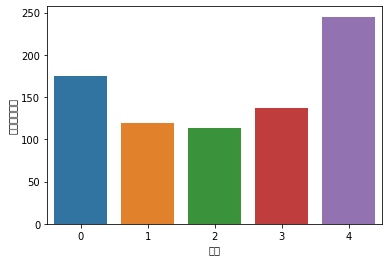

In [126]:
sns.barplot(data=train_week,x=train_week.index,y='본사휴가자수')

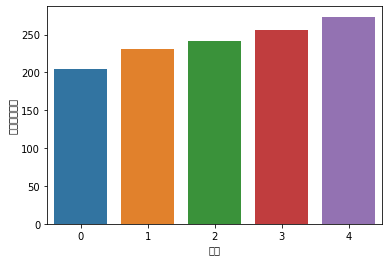

In [127]:
sns.barplot(data=train_week,x=train_week.index,y='본사출장자수')

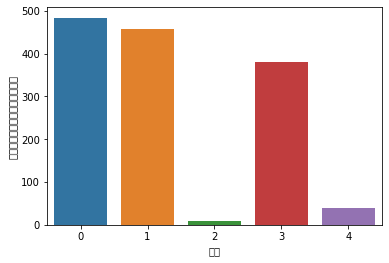

In [128]:
sns.barplot(data=train_week,x=train_week.index,y='본사시간외근무명령서승인건수')

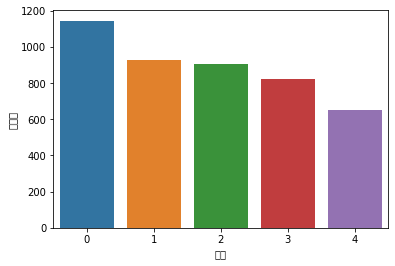

In [129]:
sns.barplot(data=train_week,x=train_week.index,y='중식계')

뭐지. 월요일에 가장 중식계가 많음 금묘일로 갈수록 떨어지는 경향..!! 왜지!!

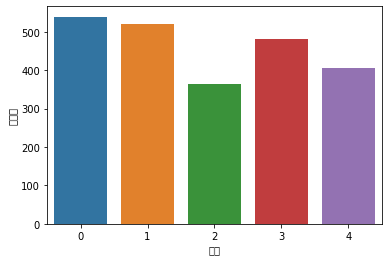

In [130]:
sns.barplot(data=train_week,x=train_week.index,y='석식계')

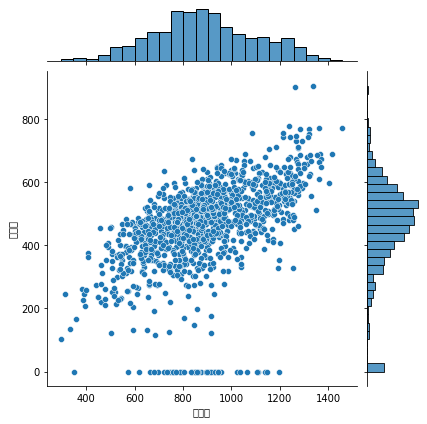

In [131]:
sns.jointplot(data=train,x='중식계',y='석식계')

오 그래도 어느정도 연관성이 중식과 석식 사이에 있어보인다

In [132]:
train.head()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계
0,2016-02-01,0,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0
1,2016-02-02,1,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0
2,2016-02-03,2,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0
3,2016-02-04,3,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0
4,2016-02-05,4,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0


In [133]:
import datetime

train['year']=train['일자'].dt.year
train['month']=train['일자'].dt.month
train['day']=train['일자'].dt.day

train.head()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계,year,month,day
0,2016-02-01,0,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0,2016,2,1
1,2016-02-02,1,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0,2016,2,2
2,2016-02-03,2,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0,2016,2,3
3,2016-02-04,3,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0,2016,2,4
4,2016-02-05,4,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0,2016,2,5


In [134]:
test['year']=test['일자'].dt.year
test['month']=test['일자'].dt.month
test['day']=test['일자'].dt.day


In [135]:
test.head()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,year,month,day
0,2021-01-27,2,2983,88,182,5,358.0,모닝롤/연유버터베이글 우유/주스 계란후라이/찐계란 단호박죽/흑미밥 우거지국 고기완자...,쌀밥/흑미밥/찰현미밥 대구지리 매운돈갈비찜 오꼬노미계란말이 상추무침 포기김치 양상추...,흑미밥 얼큰순두부찌개 쇠고기우엉볶음 버섯햄볶음 (New)아삭이고추무절임 포기김치,2021,1,27
1,2021-01-28,3,2983,104,212,409,348.0,모닝롤/대만샌드위치 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 황태국 시래기지짐 ...,쌀밥/보리밥/찰현미밥 우렁된장찌개 오리주물럭 청양부추전 수제삼색무쌈 겉절이김치 양상...,충무김밥 우동국물 오징어무침 꽃맛살샐러드 얼갈이쌈장무침 석박지,2021,1,28
2,2021-01-29,4,2983,270,249,0,294.0,모닝롤/핫케익 우유/주스 계란후라이/찐계란 오곡죽/흑미밥 매생이굴국 고구마순볶음 양...,쌀밥/흑미밥/찰현미밥 팽이장국 수제돈까스*소스 가자미조림 동초나물무침 포기김치 양상...,흑미밥 물만둣국 카레찜닭 숯불양념꼬지어묵 꼬시래기무침 포기김치,2021,1,29
3,2021-02-01,0,2924,108,154,538,322.0,모닝롤/촉촉한치즈케익 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 두부김칫국 새우완...,쌀밥/흑미밥/찰현미밥 배추들깨국 오리대패불고기 시금치프리타타 부추고추장무침 포기김치...,흑미밥 동태탕 돈육꽈리고추장조림 당면채소무침 모자반무침 포기김치,2021,2,1
4,2021-02-02,1,2924,62,186,455,314.0,모닝롤/토마토샌드 우유/주스 계란후라이/찐계란 채소죽/흑미밥 호박맑은국 오이생채 양...,쌀밥/팥밥/찰현미밥 부대찌개 닭살데리야끼조림 버섯탕수 세발나물무침 알타리김치/사과푸...,흑미밥 바지락살국 쇠고기청경채볶음 두부구이*볶은김치 머위된장무침 백김치,2021,2,2


In [136]:
train_year=train.groupby('year').sum()
train_year

,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식계,석식계,month,day
year,,,,,,,,,,
2016,458,603833,29961,53191,51986,0.0,211744.0,117908.0,1608,3648
2017,495,649684,33959,60081,57775,0.0,219018.0,111520.0,1581,3952
2018,476,660756,37462,60713,57296,0.0,211014.0,110786.0,1536,3841
2019,490,728832,43590,62848,75676,0.0,209226.0,109565.0,1606,3991
2020,464,689602,43371,50661,82127,46130.0,204686.0,99915.0,1499,3539
2021,31,50711,1943,3083,5451,6295.0,17165.0,6742.0,17,246


In [137]:
train_year_mean=train.groupby('year').mean()
train_year_mean

,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식계,석식계,month,day
year,,,,,,,,,,
2016,2.017621,2660.057269,131.986784,234.321586,229.013216,0.000000,932.792952,519.418502,7.083700,16.070485
2017,2.028689,2662.639344,139.176230,246.233607,236.782787,0.000000,897.614754,457.049180,6.479508,16.196721
2018,1.991632,2764.669456,156.744770,254.029289,239.732218,0.000000,882.903766,463.539749,6.426778,16.071130
2019,1.991870,2962.731707,177.195122,255.479675,307.626016,0.000000,850.512195,445.386179,6.528455,16.223577
2020,2.000000,2972.422414,186.943966,218.366379,353.995690,198.836207,882.267241,430.668103,6.461207,15.254310
2021,1.823529,2983.000000,114.294118,181.352941,320.647059,370.294118,1009.705882,396.588235,1.000000,14.470588


이걸보니 확실히 알겠다. 2021은 코로나때문에 회사에 안나온게 아니라 날짜가 그냥 없는거임. 아직 2021 다 안지나서, 그리고 또 2020은 재택근무자수가 최대;; 지금까지 0명이었는데, 2020,2021은 많다. 그리고 평균값은 2021년이 더 높다.

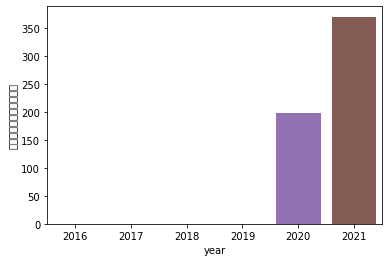

In [138]:
sns.barplot(data=train_year_mean,x=train_year.index,y='현본사소속재택근무자수')

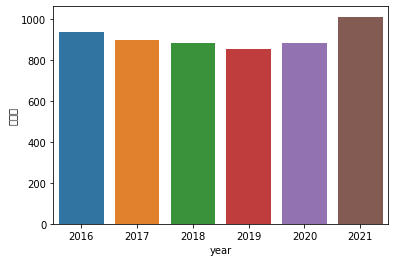

In [139]:
sns.barplot(data=train_year_mean,x=train_year.index,y='중식계')

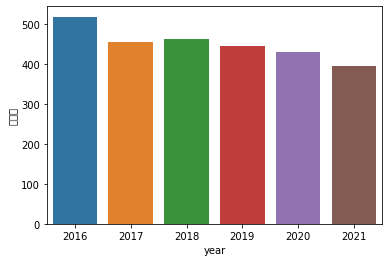

In [140]:
sns.barplot(data=train_year_mean,x=train_year.index,y='석식계')

딱히 중식계, 석식계랑 코로나랑은 관련이 없어보임;;

In [141]:
train_month_mean=train.groupby('month').mean()
train_month_mean

,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식계,석식계,year,day
month,,,,,,,,,,
1,1.970297,2823.277228,120.564356,208.415842,249.554455,62.594059,934.247525,424.564356,2018.920792,15.742574
2,2.010753,2723.935484,121.107527,225.440860,309.150538,0.139785,989.623656,514.860215,2018.010753,15.247312
3,2.028037,2748.934579,96.719626,231.485981,302.196262,26.616822,953.607477,530.700935,2017.981308,16.588785
4,1.970874,2754.349515,115.271845,243.854369,271.650485,84.330097,883.621359,480.825243,2018.019417,15.310680
5,2.020202,2755.818182,143.545455,252.727273,259.131313,44.424242,869.787879,458.131313,2018.000000,17.313131
6,2.044444,2719.766667,121.322222,257.400000,255.633333,21.433333,863.311111,460.355556,2017.733333,15.188889
7,1.972727,2791.100000,182.763636,246.236364,233.300000,30.618182,848.736364,437.300000,2018.054545,15.990909
8,2.046729,2910.794393,353.719626,221.981308,234.383178,33.747664,854.785047,459.485981,2017.953271,16.084112
9,1.968085,2886.031915,133.904255,246.255319,286.404255,82.159574,907.148936,463.617021,2018.000000,14.808511


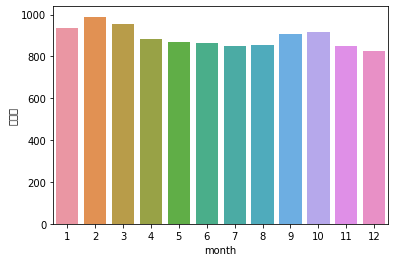

In [142]:
sns.barplot(data=train_month_mean,x=train_month_mean.index,y='중식계')

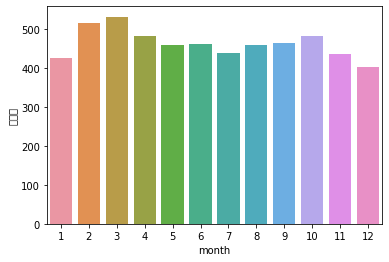

In [143]:
sns.barplot(data=train_month_mean,x=train_month_mean.index,y='석식계')

In [144]:
train_day_mean=train.groupby('day').mean()
train_day_mean

,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식계,석식계,year,month
day,,,,,,,,,,
1,2.071429,2795.964286,180.285714,218.285714,253.178571,61.535714,902.964286,461.392857,2017.750000,7.285714
2,2.000000,2813.564103,211.153846,209.769231,279.769231,46.820513,944.743590,498.487179,2018.025641,6.205128
3,2.081081,2810.837838,168.567568,229.540541,296.675676,48.513514,908.324324,466.972973,2018.216216,6.054054
4,1.925000,2812.350000,201.400000,225.250000,299.075000,43.700000,900.325000,490.675000,2018.125000,6.500000
5,1.864865,2811.459459,151.837838,236.054054,306.810811,29.837838,902.729730,495.243243,2018.081081,6.675676
6,2.000000,2835.916667,141.055556,238.972222,289.555556,52.694444,916.138889,476.611111,2018.222222,6.722222
7,2.071429,2818.404762,165.547619,233.571429,318.023810,61.119048,921.690476,494.095238,2018.095238,6.666667
8,2.142857,2809.761905,173.714286,241.928571,259.261905,60.214286,885.880952,473.357143,2018.095238,6.380952
9,2.055556,2815.833333,149.500000,239.638889,298.527778,50.583333,904.666667,485.000000,2018.083333,6.250000


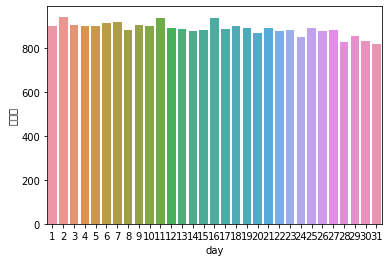

In [145]:
sns.barplot(data=train_day_mean,x=train_day_mean.index,y='중식계')

그만 알아보도록 하자.


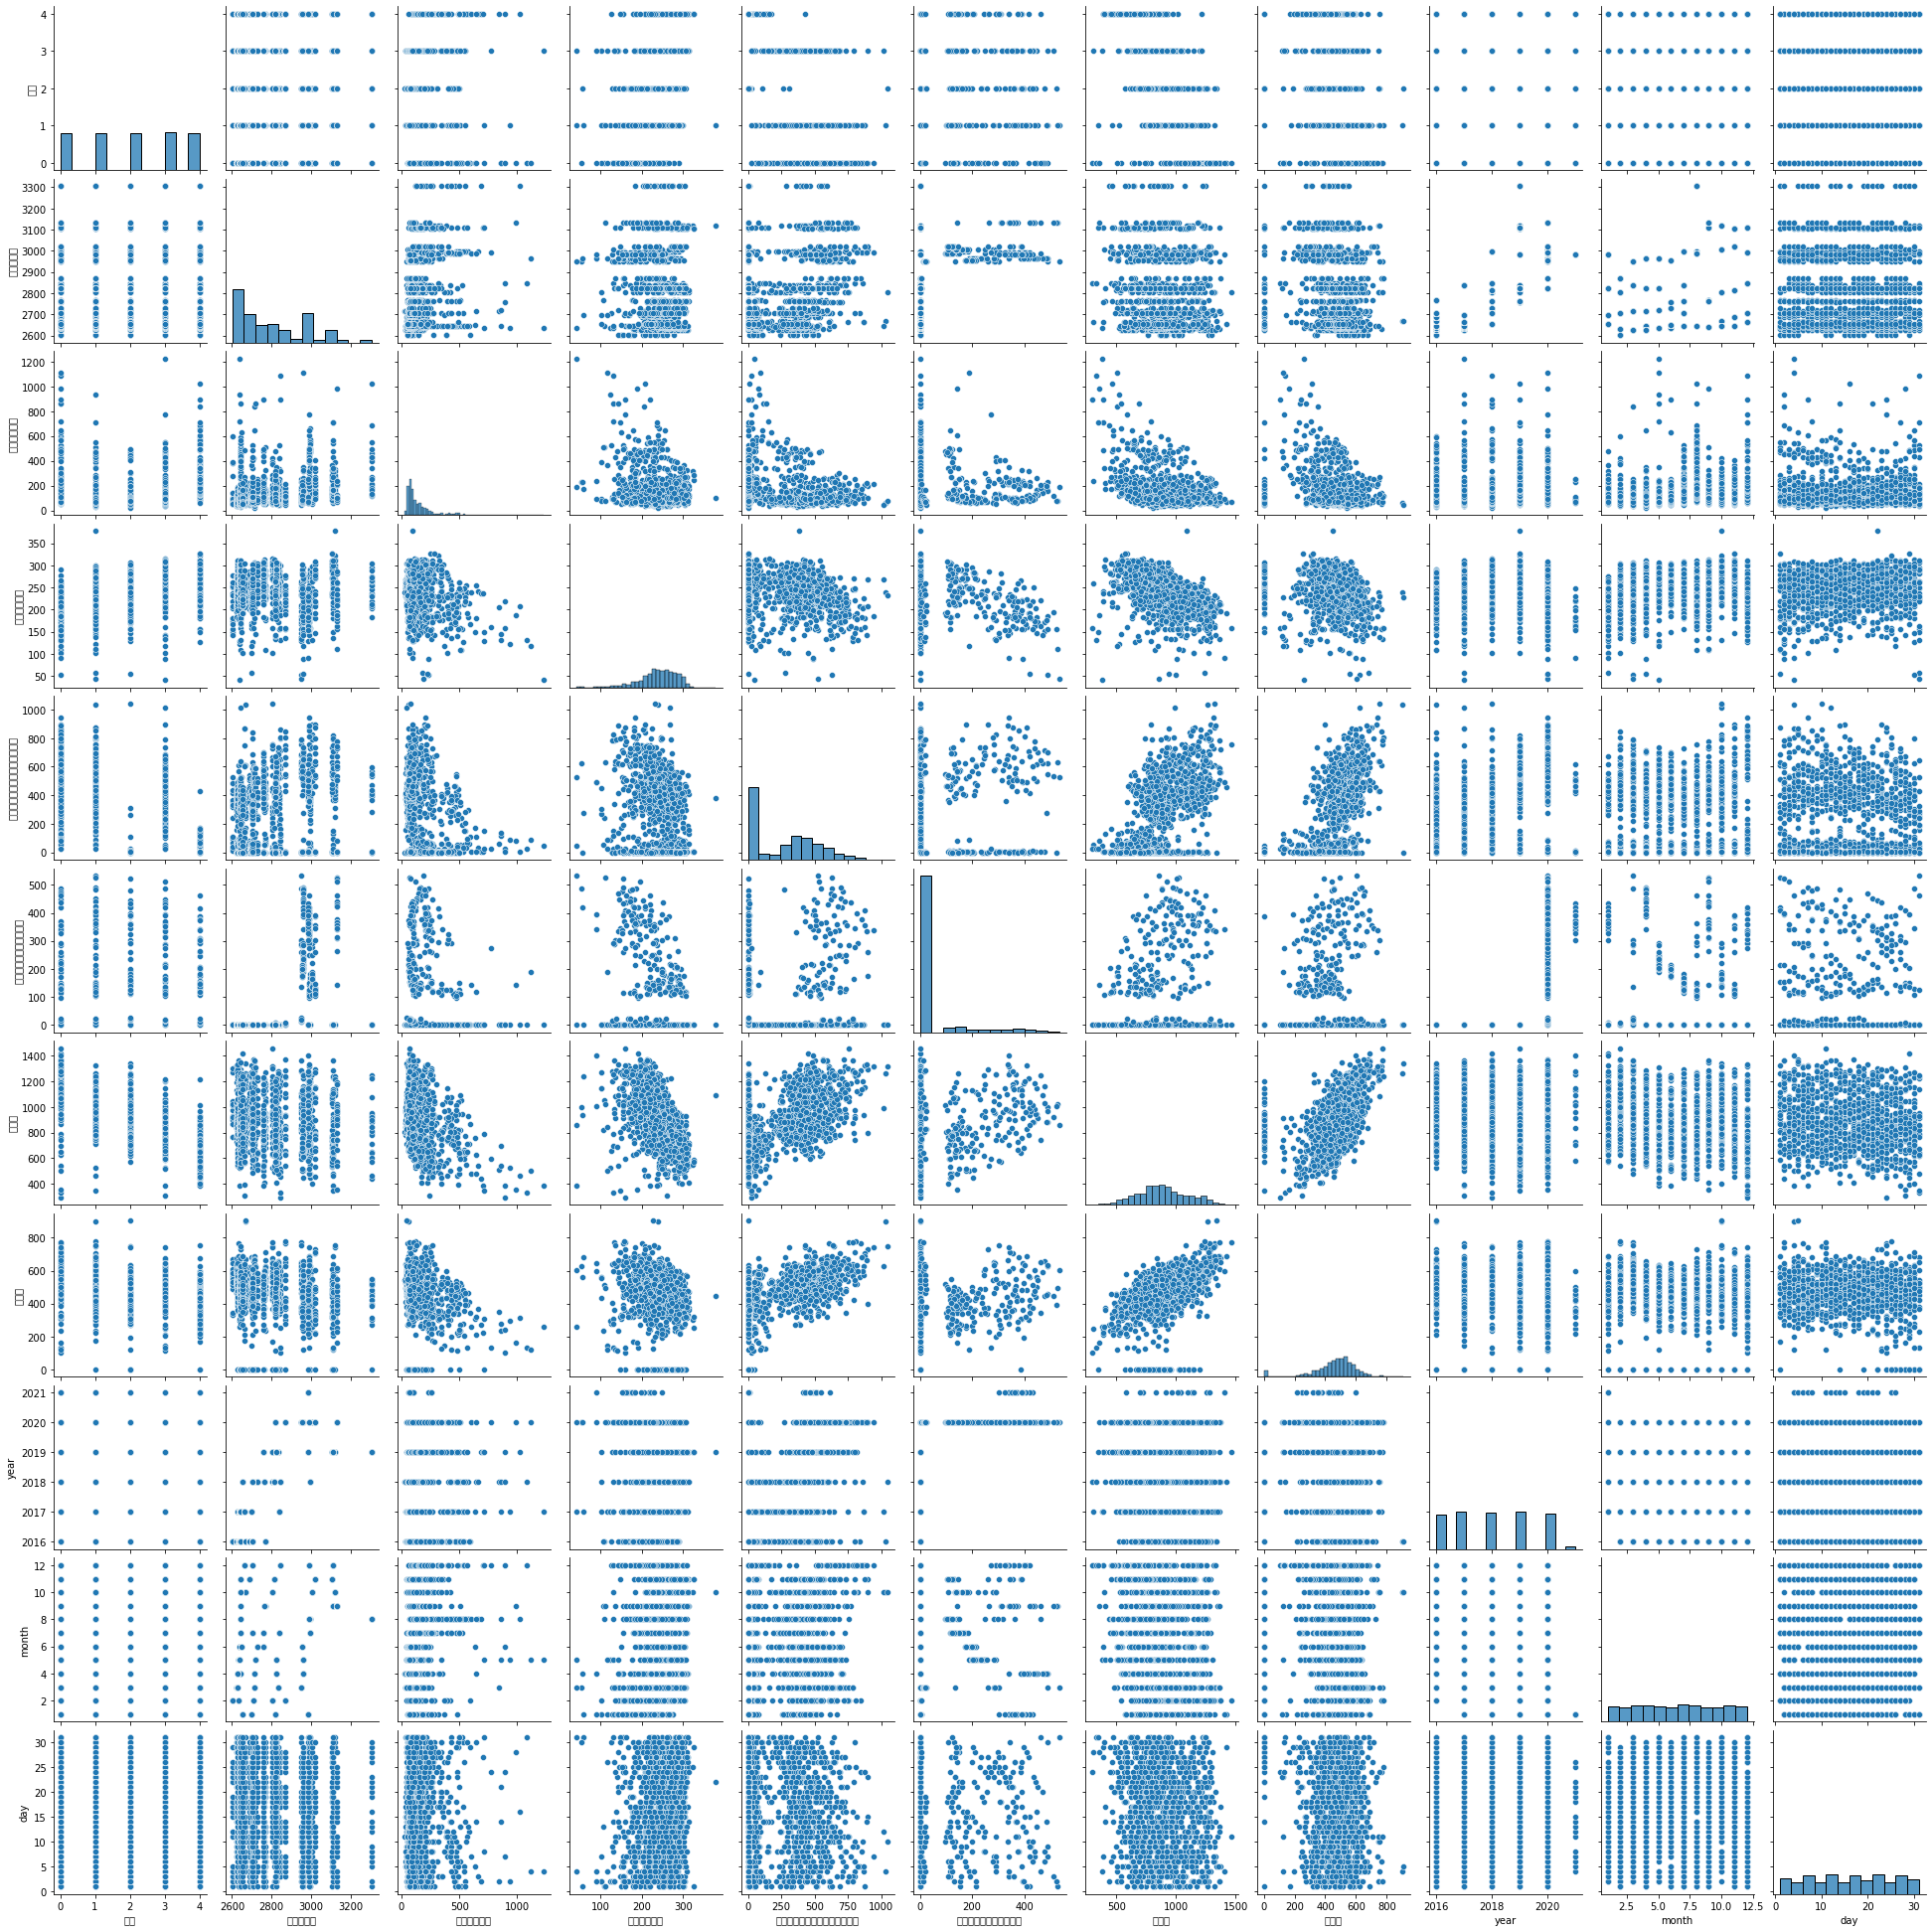

In [146]:
sns.pairplot(train)

진짜 그만알아보도록 하자

In [147]:
train.head()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계,year,month,day
0,2016-02-01,0,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0,2016,2,1
1,2016-02-02,1,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0,2016,2,2
2,2016-02-03,2,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0,2016,2,3
3,2016-02-04,3,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0,2016,2,4
4,2016-02-05,4,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0,2016,2,5


조식은 뭔가 필요없어 보여서 그냥 드랍해버리겠음 조식계는 없더라고요. 

In [148]:
train.drop(['조식메뉴'],inplace=True,axis=1)


In [149]:
test.drop(['조식메뉴'],inplace=True,axis=1)

In [150]:
train.head()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식메뉴,석식메뉴,중식계,석식계,year,month,day
0,2016-02-01,0,2601,50,150,238,0.0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0,2016,2,1
1,2016-02-02,1,2601,50,173,319,0.0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0,2016,2,2
2,2016-02-03,2,2601,56,180,111,0.0,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0,2016,2,3
3,2016-02-04,3,2601,104,220,355,0.0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0,2016,2,4
4,2016-02-05,4,2601,278,181,34,0.0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0,2016,2,5


In [151]:
train.drop('일자',inplace=True,axis=1)
test.drop('일자',inplace=True,axis=1)
train.head()

,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식메뉴,석식메뉴,중식계,석식계,year,month,day
0,0,2601,50,150,238,0.0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0,2016,2,1
1,1,2601,50,173,319,0.0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0,2016,2,2
2,2,2601,56,180,111,0.0,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0,2016,2,3
3,3,2601,104,220,355,0.0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0,2016,2,4
4,4,2601,278,181,34,0.0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0,2016,2,5


이걸 까먹었다. 년도, 달, 일자로 나누고 일자를 삭제 안함. 거슬리니까 삭제해버리자

설마 메뉴와도 연관성이 있을까??!!!!!

In [89]:
#일별 점심 메뉴를 작은 리스트로 가지고 있는 큰 리스트 만들기
lunch_menu=[]

for day in range(len(train)):
  tmp=train.loc[day,'중식메뉴'].split(' ')
  tmp=' '.join(tmp).split()

  for menu in tmp:
    if '(' in menu:
      tmp.remove(menu)
  lunch_menu.append(tmp)

In [90]:
for bob in range(len(train)):
  if '쌀밥' in lunch_menu[bob][0]:
    lunch_menu[bob][0]='밥'

In [91]:
lunch_menu[:5]

[['밥', '오징어찌개', '쇠불고기', '계란찜', '청포묵무침', '요구르트', '포기김치'],
 ['밥', '김치찌개', '가자미튀김', '모둠소세지구이', '마늘쫑무침', '요구르트', '배추겉절이'],
 ['카레덮밥', '팽이장국', '치킨핑거', '쫄면야채무침', '견과류조림', '요구르트', '포기김치'],
 ['밥', '쇠고기무국', '주꾸미볶음', '부추전', '시금치나물', '요구르트', '포기김치'],
 ['밥', '떡국', '돈육씨앗강정', '우엉잡채', '청경채무침', '요구르트', '포기김치']]

In [93]:
train['lunch_menu']=lunch_menu
train.head(2)

,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식메뉴,석식메뉴,중식계,석식계,year,month,day,lunch_menu
0,0,2601,50,150,238,0.0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0,2016,2,1,"[밥, 오징어찌개, 쇠불고기, 계란찜, 청포묵무침, 요구르트, 포기김치]"
1,1,2601,50,173,319,0.0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0,2016,2,2,"[밥, 김치찌개, 가자미튀김, 모둠소세지구이, 마늘쫑무침, 요구르트, 배추겉절이]"


In [95]:
bob=[]
soup=[]
main=[]

for i in range(len(train)):
  if lunch_menu[i][0]:
    bob.append(lunch_menu[i][0])
  if lunch_menu[i][1]:
    soup.append(lunch_menu[i][1])
  if lunch_menu[i][2]:
    main.append(lunch_menu[i][2])

In [96]:
train['bob']=bob
train['soup']=soup
train['main']=main

In [97]:
train.head()

,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식메뉴,석식메뉴,중식계,석식계,year,month,day,lunch_menu,bob,soup,main
0,0,2601,50,150,238,0.0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0,2016,2,1,"[밥, 오징어찌개, 쇠불고기, 계란찜, 청포묵무침, 요구르트, 포기김치]",밥,오징어찌개,쇠불고기
1,1,2601,50,173,319,0.0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0,2016,2,2,"[밥, 김치찌개, 가자미튀김, 모둠소세지구이, 마늘쫑무침, 요구르트, 배추겉절이]",밥,김치찌개,가자미튀김
2,2,2601,56,180,111,0.0,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0,2016,2,3,"[카레덮밥, 팽이장국, 치킨핑거, 쫄면야채무침, 견과류조림, 요구르트, 포기김치]",카레덮밥,팽이장국,치킨핑거
3,3,2601,104,220,355,0.0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0,2016,2,4,"[밥, 쇠고기무국, 주꾸미볶음, 부추전, 시금치나물, 요구르트, 포기김치]",밥,쇠고기무국,주꾸미볶음
4,4,2601,278,181,34,0.0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0,2016,2,5,"[밥, 떡국, 돈육씨앗강정, 우엉잡채, 청경채무침, 요구르트, 포기김치]",밥,떡국,돈육씨앗강정


In [101]:
train['bob'].value_counts()[:10]

밥           1003
콩나물밥          23
카레덮밥          18
나물비빔밥         15
곤드레밥*강된장      12
단호박영양밥        10
비빔밥            8
곤드레밥           8
김치제육덮밥         8
카레라이스          8
Name: bob, dtype: int64

In [100]:
train['soup'].value_counts()[:10]

맑은국      46
콩나물국     44
된장찌개     37
어묵국      31
가쯔오장국    28
아욱국      28
배추된장국    28
근대국      26
꽃게탕      25
순두부찌개    23
Name: soup, dtype: int64

## 모델

In [76]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor


submission=pd.read_csv('sample_submission.csv')

In [74]:
train.columns

Index(['요일', '본사정원수', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수', '현본사소속재택근무자수',
       '중식메뉴', '석식메뉴', '중식계', '석식계', 'year', 'month', 'day'],
      dtype='object')

In [80]:
x_train=train[['요일', '본사정원수', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수', '현본사소속재택근무자수',
        'year', 'month', 'day']]

y1_train=train['중식계']
y2_train=train['석식계']

x_test=test[['요일', '본사정원수', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수', '현본사소속재택근무자수',
        'year', 'month', 'day']]

In [81]:
model1=RandomForestRegressor(n_jobs=-1,random_state=0)
model2=RandomForestRegressor(n_jobs=-1,random_state=0)

In [83]:
model1.fit(x_train,y1_train)
model2.fit(x_train,y2_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [84]:
pred1=model1.predict(x_test)
pred2=model2.predict(x_test)


In [85]:
submission['중식계']=pred1
submission['석식계']=pred2

In [86]:
submission.to_csv('random1.csv',index=False)

### 저녁 메뉴 만들기

In [102]:
#일별 점심 메뉴를 작은 리스트로 가지고 있는 큰 리스트 만들기
dinner_menu=[]

for day in range(len(train)):
  tmp=train.loc[day,'석식메뉴'].split(' ')
  tmp=' '.join(tmp).split()

  for menu in tmp:
    if '(' in menu:
      tmp.remove(menu)
  dinner_menu.append(tmp)

In [105]:
train['dinner_menu'] = dinner_menu

In [106]:
len(train['dinner_menu'])

1205

In [109]:
train['석식메뉴'].value_counts()

    *                                                             19
                                                                   4
    자기개발의날                                                         3
    자기계발의날                                                         3
     *                                                             2
                                                                  ..
쌀밥/잡곡밥 (쌀:국내산) 뼈해장국  황태양념구이  메추리알조림  시금치무침  석박지 (김치:국내산)           1
쌀밥/잡곡밥 (쌀:국내산) 부대찌개  고등어구이  비엔나감자볶음  물파래무침  포기김치 (김치:국내산)          1
유부초밥 (쌀:국내산) 새우튀김우동  시저샐러드  오꼬노미야끼  단무지무침  포기김치 (배추,고추가루:국내산)      1
쌀밥/잡곡밥 (쌀:국내산) 육개장  꽁치구이  궁중떡볶이  무생채  포기김치 (김치:국내산)                1
볶음밥  단호박스프  로제스파게티  쇠고기퀘사디아  홍시드레싱샐러드/음료  포기김치 (김치:국내산)            1
Name: 석식메뉴, Length: 1168, dtype: int64

In [110]:
bobd=[]
soupd=[]
maind=[]

for word in dinner_menu:
    if len(word) == 0:
        bobd.append('None') #비어있으면 그 날짜자체가 없어질수있으므로 'None' 값으로 대체
        soupd.append('None')
        maind.append('None')
    elif '*' in word:
        bobd.append('None')
        soupd.append('None')
        maind.append('None')
    elif '가정의날' in word:
        bobd.append('None')
        soupd.append('None')
        maind.append('None')
    elif '가정의달' in word:
        bobd.append('None')
        soupd.append('None')
        maind.append('None')
    elif '자기계발의날' in word:
        bobd.append('None')
        soupd.append('None')
        maind.append('None')
    elif '*자기계발의날*' in word:
        bobd.append('None')
        soupd.append('None')
        maind.append('None')
    elif '자기개발의날' in word:
        bobd.append('None')
        soupd.append('None')
        maind.append('None')

    else:
        bobd.append(word[0])
        soupd.append(word[1])
        maind.append(word[2])

In [111]:
train['bobd']=bobd
train['soupd']=soupd
train['maind']=maind

In [114]:
train['maind'].value_counts()[:10]

None       41
떡볶이        16
닭갈비        16
돈육강정       15
고추잡채*꽃빵    14
돈육장조림      14
유린기        14
돈육굴소스볶음    14
깐풍기        14
사천식탕수육     13
Name: maind, dtype: int64

In [115]:
train.head()

,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식메뉴,석식메뉴,중식계,석식계,year,month,day,lunch_menu,bob,soup,main,dinner_menu,bobd,soupd,maind
0,0,2601,50,150,238,0.0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0,2016,2,1,"[밥, 오징어찌개, 쇠불고기, 계란찜, 청포묵무침, 요구르트, 포기김치]",밥,오징어찌개,쇠불고기,"[밥, 육개장, 자반고등어구이, 두부조림, 건파래무침, 포기김치]",밥,육개장,자반고등어구이
1,1,2601,50,173,319,0.0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0,2016,2,2,"[밥, 김치찌개, 가자미튀김, 모둠소세지구이, 마늘쫑무침, 요구르트, 배추겉절이]",밥,김치찌개,가자미튀김,"[콩나물밥*양념장, 어묵국, 유산슬, 아삭고추무침, 바나나, 포기김치]",콩나물밥*양념장,어묵국,유산슬
2,2,2601,56,180,111,0.0,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0,2016,2,3,"[카레덮밥, 팽이장국, 치킨핑거, 쫄면야채무침, 견과류조림, 요구르트, 포기김치]",카레덮밥,팽이장국,치킨핑거,"[밥, 청국장찌개, 황태양념구이, 고기전, 새송이버섯볶음, 포기김치]",밥,청국장찌개,황태양념구이
3,3,2601,104,220,355,0.0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0,2016,2,4,"[밥, 쇠고기무국, 주꾸미볶음, 부추전, 시금치나물, 요구르트, 포기김치]",밥,쇠고기무국,주꾸미볶음,"[미니김밥*겨자장, 우동, 멕시칸샐러드, 군고구마, 무피클, 포기김치]",미니김밥*겨자장,우동,멕시칸샐러드
4,4,2601,278,181,34,0.0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0,2016,2,5,"[밥, 떡국, 돈육씨앗강정, 우엉잡채, 청경채무침, 요구르트, 포기김치]",밥,떡국,돈육씨앗강정,"[밥, 차돌박이찌개, 닭갈비, 감자소세지볶음, 콩나물무침, 포기김치]",밥,차돌박이찌개,닭갈비
